In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [3]:
def real(x):
    return np.sin(x)+np.cos(3*x)

In [189]:
A = 0
B = 2
n = 141
h = (B-A)/(n-1)
x_j = np.linspace(A, B, n)

def basis(x,n, step):
    answ = np.zeros((n,n))

    
def q(x):
    return 2*np.sin(x)
def k(x):
    return 2*x
def f(k,q,real,a,b):
    
    du = lambda a: (real(a+1/10000) - real(a))/(1/10000)
    f_x = lambda x: -(k(x+1/10000)*du(x+1/10000) - k(x)*du(x))/(1/10000) + q(x)*real(x)  
    return f_x

In [190]:
rhs = f(k,q,real,A,B)
rhs(1)

-16.62383429463506

In [191]:
x_j

array([0.        , 0.01428571, 0.02857143, 0.04285714, 0.05714286,
       0.07142857, 0.08571429, 0.1       , 0.11428571, 0.12857143,
       0.14285714, 0.15714286, 0.17142857, 0.18571429, 0.2       ,
       0.21428571, 0.22857143, 0.24285714, 0.25714286, 0.27142857,
       0.28571429, 0.3       , 0.31428571, 0.32857143, 0.34285714,
       0.35714286, 0.37142857, 0.38571429, 0.4       , 0.41428571,
       0.42857143, 0.44285714, 0.45714286, 0.47142857, 0.48571429,
       0.5       , 0.51428571, 0.52857143, 0.54285714, 0.55714286,
       0.57142857, 0.58571429, 0.6       , 0.61428571, 0.62857143,
       0.64285714, 0.65714286, 0.67142857, 0.68571429, 0.7       ,
       0.71428571, 0.72857143, 0.74285714, 0.75714286, 0.77142857,
       0.78571429, 0.8       , 0.81428571, 0.82857143, 0.84285714,
       0.85714286, 0.87142857, 0.88571429, 0.9       , 0.91428571,
       0.92857143, 0.94285714, 0.95714286, 0.97142857, 0.98571429,
       1.        , 1.01428571, 1.02857143, 1.04285714, 1.05714

In [228]:
def find_phi(x,j):

    if x < x_j[j-1] or x> x_j[j+1]:
        return 0
    elif x <= x_j[j]:
        return (x-x_j[j-1])/h
    else:
        return (x_j[j+1]-x)/h

In [229]:
alpha_ii = np.zeros((n,n))
alpha_ii


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
acc = 1000
step = h/(acc-1)
for i in range(1,n):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]+l*step -h) + (x_j[i]+l*step -h - x_j[i-1])*(x_j[i] - x_j[i]+l*step+h)*q(x_j[i]+l*step-h))*step
    alpha_ii[i-1,i] = 1/h**2* sum_ii
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]+l*step) + (x_j[i]+l*step - x_j[i])*(x_j[i+1] - x_j[i]+l*step)*q(x_j[i]+l*step))*step
    alpha_ii[i+1,i] = 1/h**2* sum_ii
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (k(x_j[i]+l*step-h) + (x_j[i]+l*step-h - x_j[i-1])**2*q(x_j[i]+l*step-h))*step
        sum_ii+= (k(x_j[i]+l*step) + (-x_j[i]+l*step + x_j[i+1])**2*q(x_j[i]+l*step))*step
    alpha_ii[i,i] = 1/h**2* sum_ii    
alpha_ii

array([[  -4.04161072,   -1.0007625 ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  -1.0007625 ,    4.00563855,   -3.00242401, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   -3.00242401,    8.01073175, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  552.62257344,
        -277.25542101,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -277.25542101,
         556.62613819, -279.25756118],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -279.25756118,    0.        ]])

In [231]:
b_ii = np.zeros(n)


b_ii= b_ii.T
b_ii
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [232]:
acc = 1000
step = h/(acc-1)
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (rhs(x_j[i]+l*step)*(x_j[i+1] - x_j[i]+l*step))*step
        sum_ii+= (rhs(x_j[i]+l*step-h)*( x_j[i]+l*step - h -x_j[i-1]))*step
    b_ii[i] = 1/h * sum_ii
b_ii

array([ 4.52165705, -0.03639227, -0.02086748, -0.0054213 ,  0.00988819,
        0.02500343,  0.03986753,  0.05442447,  0.06861919,  0.08239783,
        0.09570781,  0.10849803,  0.12071898,  0.13232291,  0.14326395,
        0.15349825,  0.1629841 ,  0.17168205,  0.17955504,  0.18656851,
        0.19269048,  0.19789167,  0.20214557,  0.20542854,  0.20771988,
        0.20900189,  0.20925993,  0.2084825 ,  0.20666124,  0.20379098,
        0.19986979,  0.19489898,  0.18888309,  0.18182994,  0.17375059,
        0.16465931,  0.15457362,  0.14351417,  0.13150478,  0.11857233,
        0.10474675,  0.09006093,  0.07455063,  0.05825444,  0.04121368,
        0.02347227,  0.00507667, -0.01392425, -0.03347933, -0.05353523,
       -0.07403658, -0.09492607, -0.11614466, -0.13763165, -0.15932491,
       -0.18116095, -0.20307514, -0.22500186, -0.24687466, -0.26862641,
       -0.29018952, -0.31149605, -0.33247795, -0.35306719, -0.37319596,
       -0.39279683, -0.41180296, -0.43014824, -0.44776748, -0.46

In [233]:
y_i = np.linalg.solve(alpha_ii,b_ii)
y_i

array([-1.04082347, -0.31481372, -0.06095761,  0.09547332,  0.20806474,
        0.2947171 ,  0.36359823,  0.41913351,  0.46400315,  0.49996484,
        0.52824354,  0.54973576,  0.56512499,  0.57495107,  0.5796537 ,
        0.5796011 ,  0.57510927,  0.56645546,  0.55388773,  0.53763189,
        0.51789661,  0.49487733,  0.46875911,  0.43971888,  0.40792714,
        0.37354932,  0.3367468 ,  0.29767767,  0.25649741,  0.21335931,
        0.16841487,  0.12181402,  0.07370532,  0.02423612, -0.02644741,
       -0.07820025, -0.13087849, -0.18433944, -0.2384416 , -0.29304483,
       -0.34801039, -0.40320106, -0.45848129, -0.51371734, -0.56877736,
       -0.62353162, -0.67785262, -0.73161528, -0.78469704, -0.83697812,
       -0.88834158, -0.93867357, -0.98786346, -1.03580397, -1.0823914 ,
       -1.12752574, -1.17111081, -1.21305447, -1.25326871, -1.29166981,
       -1.3281785 , -1.36272004, -1.39522439, -1.42562631, -1.45386547,
       -1.47988654, -1.50363934, -1.52507886, -1.54416539, -1.56

In [234]:
u_app = lambda x: np.sum([y_i[j]*find_phi(x,j) for j in range(n-1)])

In [235]:
X = np.linspace(A,B,1000)
Y_app = [u_app(x) for x in X]

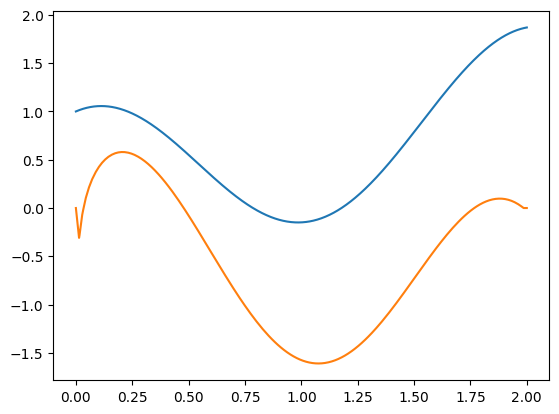

In [236]:
plt.plot( X,real(X))
plt.plot( X,Y_app)